In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import cm
import pandas as pd


THRESHOLD = 0.5
W1 = 1
W2 = 20
W3 = 100
W4 = 0.01


def cost_function(true, predicted):
    """
        true: true values in 1D numpy array
        predicted: predicted values in 1D numpy array
        return: float
    """
    cost = (true - predicted) ** 2

    # true above threshold (case 1)
    mask = true > THRESHOLD
    mask_w1 = np.logical_and(predicted > true, mask)
    mask_w2 = np.logical_and(np.logical_and(predicted < true, predicted > THRESHOLD), mask)
    mask_w3 = np.logical_and(predicted < THRESHOLD, mask)

    cost[mask_w1] = cost[mask_w1] * W1
    cost[mask_w2] = cost[mask_w2] * W2
    cost[mask_w3] = cost[mask_w3] * W3

    # true value below threshold (case 2)
    mask = true <= THRESHOLD
    mask_w1 = np.logical_and(predicted > true, mask)
    mask_w2 = np.logical_and(predicted < true, mask)

    cost[mask_w1] = cost[mask_w1] * W1
    cost[mask_w2] = cost[mask_w2] * W2

    # reward for correctly identified safe regions
    reward = W4 * np.logical_and(predicted <= THRESHOLD, true <= THRESHOLD)

    return np.mean(cost) - np.mean(reward)


In [2]:
train_x_name = "train_x.csv"
train_y_name = "train_y.csv"

train_x = np.loadtxt(train_x_name, delimiter=',')
train_y = np.loadtxt(train_y_name, delimiter=',')

# load the test dateset
test_x_name = "test_x.csv"
test_x = np.loadtxt(test_x_name, delimiter=',')

In [3]:
df_vals = np.stack([train_x[:,0],train_x[:,1],train_y],axis=1)
print(df_vals)
print(df_vals.shape)

In [54]:
print(train_x)
print(np.shape(train_x))

print(train_y)
print(np.shape(train_y))

print(test_x)
print(np.shape(test_x))

[[-1.         -1.        ]
 [-1.         -0.98657718]
 [-1.         -0.97315436]
 ...
 [-0.47651007 -0.73154362]
 [ 0.5033557   0.53020134]
 [ 0.00671141  0.5033557 ]]
(17250, 2)
[0.75400097 0.83958557 0.81706415 ... 0.22523587 0.49737222 0.29129925]
(17250,)
[[ 0.95973154  0.58389262]
 [ 0.02013423 -0.94630872]
 [ 0.61073826  0.66442953]
 [ 0.36912752 -0.67785235]
 [ 0.16778523  0.65100671]
 [ 0.08724832  0.3557047 ]
 [ 0.70469799  0.69127517]
 [ 0.66442953 -0.0738255 ]
 [ 0.5704698  -0.91946309]
 [ 0.85234899 -0.5704698 ]
 [ 0.55704698 -0.38255034]
 [ 0.08724832 -0.62416107]
 [-0.23489933 -0.54362416]
 [ 0.5033557  -0.66442953]
 [-0.32885906  0.77181208]
 [-0.10067114 -0.5033557 ]
 [ 0.42281879  0.26174497]
 [ 0.86577181 -0.18120805]
 [ 0.89261745 -0.94630872]
 [ 0.0738255   0.5704698 ]
 [ 0.08724832  0.75838926]
 [ 0.85234899  0.74496644]
 [ 0.12751678  0.79865772]
 [ 0.97315436 -0.0738255 ]
 [ 0.67785235  0.26174497]
 [ 0.15436242 -0.5704698 ]
 [-0.42281879 -0.90604027]
 [ 0.557046

(array([1350., 1350., 1350., 1350., 1350., 1350., 1350., 1350., 1350.,
        1350., 1350., 1350.,  900.,    6.,    0.,    0.,    3.,    3.,
           0.,    3.,    6.,    9.,    3.,    3.,   12.,    3.,    9.,
           3.,    6.,    9.,    0.,    3.,    9.,    0.,    3.,    9.,
           0.,    0.,    6.,   15.,    3.,    0.,    3.,    6.,    0.,
           6.,    3.,    0.,    3.,    3.]),
 array([-1.        , -0.96053691, -0.92107383, -0.88161074, -0.84214765,
        -0.80268456, -0.76322148, -0.72375839, -0.6842953 , -0.64483221,
        -0.60536913, -0.56590604, -0.52644295, -0.48697987, -0.44751678,
        -0.40805369, -0.3685906 , -0.32912752, -0.28966443, -0.25020134,
        -0.21073826, -0.17127517, -0.13181208, -0.09234899, -0.05288591,
        -0.01342282,  0.02604027,  0.06550336,  0.10496644,  0.14442953,
         0.18389262,  0.2233557 ,  0.26281879,  0.30228188,  0.34174497,
         0.38120805,  0.42067114,  0.46013423,  0.49959732,  0.5390604 ,
         0.57852

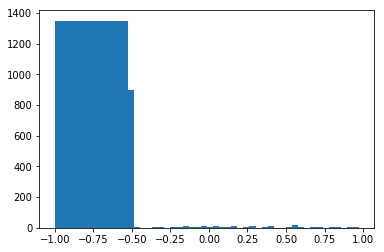

In [8]:
plt.hist(train_x[:,0],bins=50)

(array([345., 342., 348., 345., 345., 342., 354., 345., 342., 348., 342.,
        351., 342., 342., 342., 345., 345., 342., 348., 342., 354., 345.,
        348., 342., 351., 345., 342., 345., 342., 348., 345., 348., 348.,
        342., 342., 345., 345., 348., 351., 342., 342., 342., 342., 345.,
        342., 342., 345., 345., 342., 348.]),
 array([-1.  , -0.96, -0.92, -0.88, -0.84, -0.8 , -0.76, -0.72, -0.68,
        -0.64, -0.6 , -0.56, -0.52, -0.48, -0.44, -0.4 , -0.36, -0.32,
        -0.28, -0.24, -0.2 , -0.16, -0.12, -0.08, -0.04,  0.  ,  0.04,
         0.08,  0.12,  0.16,  0.2 ,  0.24,  0.28,  0.32,  0.36,  0.4 ,
         0.44,  0.48,  0.52,  0.56,  0.6 ,  0.64,  0.68,  0.72,  0.76,
         0.8 ,  0.84,  0.88,  0.92,  0.96,  1.  ]),
 <a list of 50 Patch objects>)

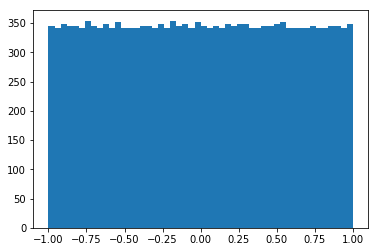

In [9]:
plt.hist(train_x[:,1],bins=50)

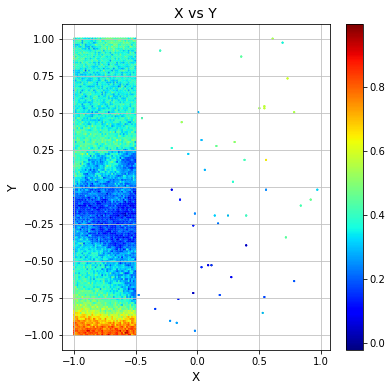

In [13]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X vs Y",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

# scatter with colormap mapping to z value
points = ax.scatter(train_x[:,0],train_x[:,1],s=1,c=train_y, marker = 'o', cmap = cm.jet );
fig.colorbar(points)

plt.show()

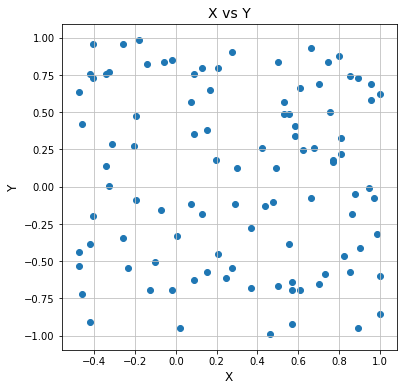

In [56]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X vs Y",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

# scatter with colormap mapping to z value
points = ax.scatter(test_x[:,0],test_x[:,1])
#fig.colorbar(points)

plt.show()

In [4]:
df = pd.DataFrame(data = df_vals,columns = ['x0','x1','y'])

In [5]:
df.shape

(17250, 3)

In [65]:
df_left = df[df['x0']<-0.5]
df_left = df_left[df_left['x0']>-0.54]

df_right = df[df['x0']>-0.5]

#df_filtered = df[df['x0']>-0.52]
#df_filtered = df_filtered[df_filtered['x0']>-0.55]

In [66]:
print(df_left.shape)
print(df_right.shape)

(1350, 3)
(150, 3)


(15, 3)

In [67]:
"""
X = df_filtered[['x0','x1']].values
y = df_filtered['y'].values
"""

df_train = pd.concat([df_left,df_right])
X = df_train[['x0','x1']].values
y = df_train['y'].values


In [68]:
df_train

,x0,x1,y
5250,-0.530201,-1.000000,0.777787
5251,-0.530201,-0.986577,0.834328
5252,-0.530201,-0.973154,0.791078
5253,-0.530201,-0.959732,0.841892
5254,-0.530201,-0.946309,0.706828
5255,-0.530201,-0.932886,0.776470
5256,-0.530201,-0.919463,0.732744
5257,-0.530201,-0.906040,0.766247
5258,-0.530201,-0.892617,0.689707
5259,-0.530201,-0.879195,0.673675


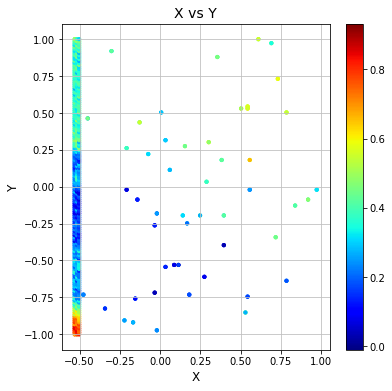

In [69]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.set_title("X vs Y",fontsize=14)
ax.set_xlabel("X",fontsize=12)
ax.set_ylabel("Y",fontsize=12)
ax.grid(True,linestyle='-',color='0.75')

# scatter with colormap mapping to z value
points = ax.scatter(X[:,0],
                    X[:,1],
                    s=10,
                    c=y, 
                    marker = 'o', cmap = cm.jet );
fig.colorbar(points)

plt.show()

In [70]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF

In [71]:
#no validation

#kernel = DotProduct() + WhiteKernel()#
kernel = RBF()

gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X, y)

print(np.shape(X))

gpr.score(X,y)
y_pred = gpr.predict(X)
print(y_pred)
print(np.shape(y_pred))
print(cost_function(y,y_pred))


(1500, 2)
[0.74993396 0.78952307 0.8004171  ... 0.21268255 0.56287579 0.30743527]
(1500,)
0.01028340592522192


In [73]:
X_right = df_right[['x0','x1']].values
y_right = df_right['y'].values
y_pred_right = gpr.predict(X_right)
print(y_pred_right)
print(np.shape(y_pred_right))
print(cost_function(y_right,y_pred_right))


[0.16974384 0.56291313 0.40520048 0.37519944 0.49415731 0.10766935
 0.32935563 0.04801172 0.38652352 0.28611691 0.43404418 0.35634768
 0.24523342 0.27481919 0.22767878 0.16850947 0.42389023 0.12331772
 0.3168791  0.28264421 0.24658304 0.21573961 0.44153678 0.55044878
 0.59614229 0.36797845 0.58223951 0.54462682 0.37048817 0.39498317
 0.06469887 0.07660949 0.37821817 0.32496163 0.45063096 0.08889379
 0.19676027 0.15849274 0.10446852 0.50599384 0.22507954 0.05738893
 0.30261257 0.4031868  0.11990285 0.47290385 0.58799231 0.21268255
 0.56287575 0.30743524 0.16974384 0.56291313 0.40520048 0.37519944
 0.49415731 0.10766935 0.32935563 0.04801172 0.38652352 0.28611691
 0.43404418 0.35634768 0.24523342 0.27481919 0.22767878 0.16850947
 0.42389023 0.12331772 0.3168791  0.28264421 0.24658304 0.21573961
 0.44153678 0.55044878 0.59614232 0.36797842 0.58223951 0.54462682
 0.37048817 0.39498317 0.06469887 0.07660949 0.37821817 0.32496163
 0.45063096 0.08889379 0.19676024 0.15849268 0.10446852 0.5059

In [77]:
#cross validation
K_cv = 10

df_right = df_right.sample(frac=1,random_state=42)
df_right_splits = np.array_split(df_right,K_cv)

#print(type(df_right_splits[0]))
#print(df_right_splits[0].shape)

kernel = RBF()

val_cost_list = []
for i in range(0,K_cv):
    
    
    print(i)
    df_train_list = [df_left]
    for j in range(0,K_cv):
        if j!=i:
            df_train_list.append(df_right_splits[j])
    
    df_train = pd.concat(df_train_list)
    df_val = df_right_splits[i]
    
    X_train = df_train[['x0','x1']].values
    y_train = df_train['y'].values
    X_val = df_val[['x0','x1']].values
    y_val = df_val['y'].values
    
    gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, y_train)

    print("train and val shapes %s %s %s %s"%(str(np.shape(X_train)),
                                              str(np.shape(y_train)),
                                              str(np.shape(X_val)),
                                              str(np.shape(y_val))))
    
    


    print("training gpr score %f"%(gpr.score(X_train,y_train)))

    y_train_pred = gpr.predict(X_train)
    print(np.shape(y_train_pred))
    print("training cost fn %f"%(cost_function(y_train,y_train_pred)))

    y_val_pred = gpr.predict(X_val)
    print(np.shape(y_val_pred))
    val_cost = cost_function(y_val,y_val_pred)
    print("val cost fn %f"%(val_cost))
    val_cost_list.append(val_cost)

val_cost_list = np.array(val_cost_list)
print(np.mean(val_cost_list))
print(np.std(val_cost_list))

0
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.930153
(1485,)
training cost fn 0.010349
(15,)
val cost fn 0.003495
1
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.931220
(1485,)
training cost fn 0.009758
(15,)
val cost fn 0.041134
2
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.931247
(1485,)
training cost fn 0.010230
(15,)
val cost fn 0.024832
3
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.930660
(1485,)
training cost fn 0.010276
(15,)
val cost fn 0.011462
4
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.931638
(1485,)
training cost fn 0.009745
(15,)
val cost fn 0.216826
5
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.931230
(1485,)
training cost fn 0.009952
(15,)
val cost fn 0.025347
6
train and val shapes (1485, 2) (1485,) (15, 2) (15,)
training gpr score 0.931161
(1485,)
training cost fn 0.010240
(15,)
val cost fn 0

0.05037175187449485
0.06499700462701012
